In [ ]:
pip install category_encoders

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np #mathematical calculations
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno # plotting missing values
from sklearn.utils import shuffle
from category_encoders import TargetEncoder, OneHotEncoder
import warnings # supress warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


# Exploratory Data Analysis (EDA)

In [ ]:
#using pandas to read the files
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
print(df_test.shape)
print(df_train.shape)

(36183, 12)
(54273, 13)


In [ ]:
#loading the first 5 rows of the df
df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [ ]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id      

In [ ]:
df_train["fuel_type"].unique()

array(['Gasoline', 'Hybrid', 'E85 Flex Fuel', 'Diesel', '–',
       'Plug-In Hybrid', 'not supported'], dtype=object)

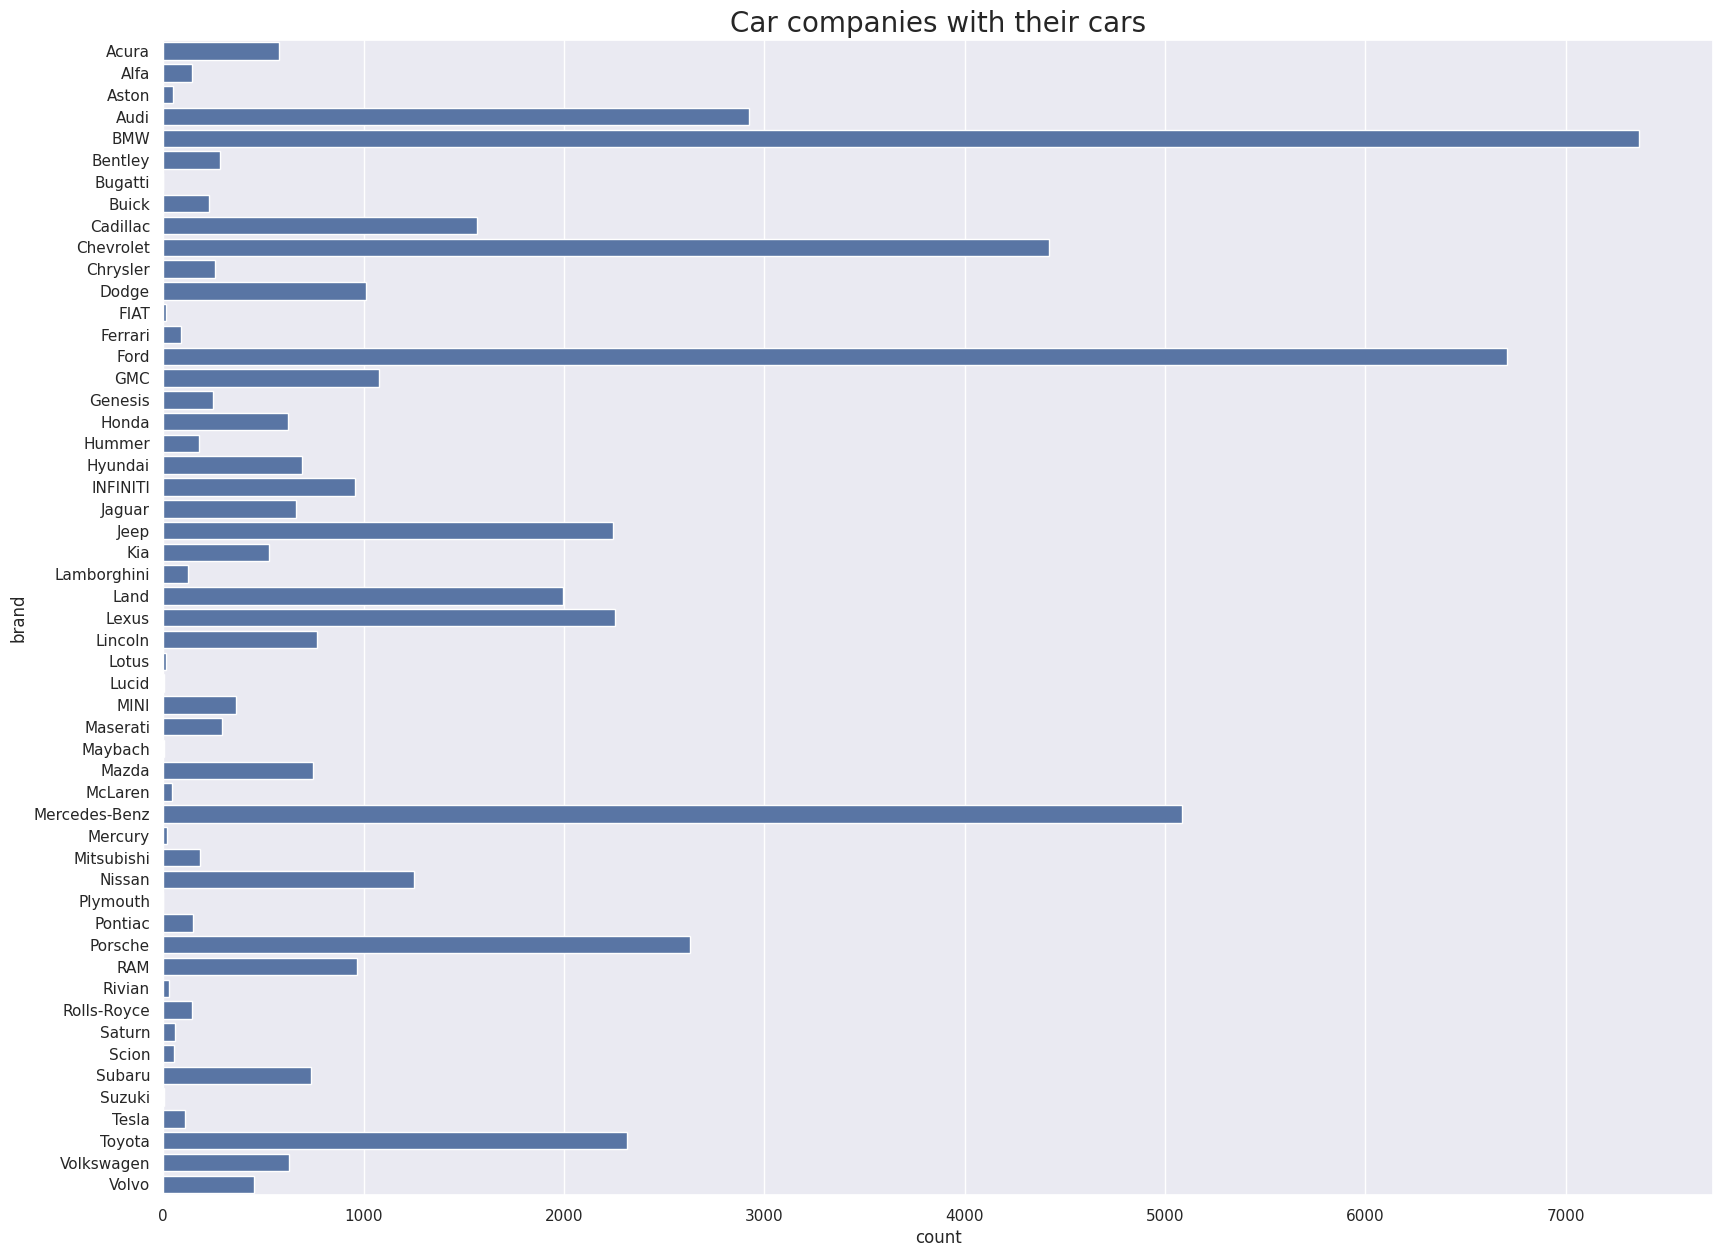

In [ ]:
plt.figure(figsize = (20, 15))
sns.countplot(y = df_train.brand.sort_values())
plt.title("Car companies with their cars", fontsize = 20)
plt.show();

Taking a look at this plot shows that BMW manufacturer has the highest number of cars. On the other hand, there are manufacturers such as Bugatti,Lucid and Plymouth that don’t usually have a large number of cars.

There is no missung data

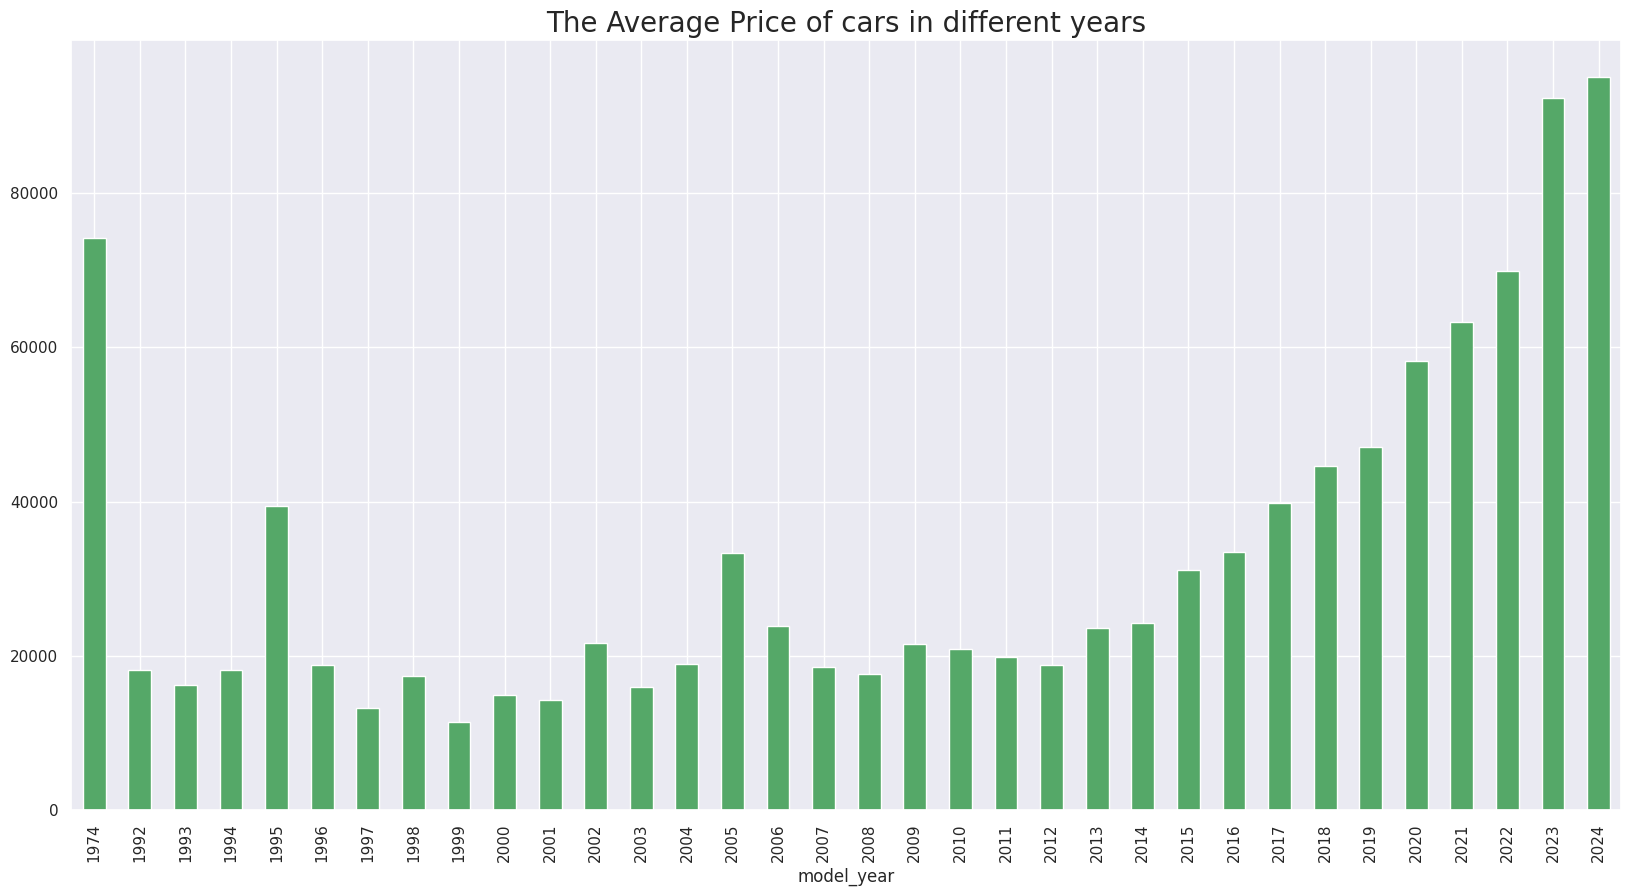

In [ ]:
plt.figure(figsize = (20, 10))
df_train.groupby('model_year')['price'].mean().plot(kind = 'bar', color = 'g')
plt.title("The Average Price of cars in different years", fontsize = 20)
plt.show()

It is important to group the information so that specific attributes and features could be extracted and analyzed. In our case, we have grouped the cars based on the years of manufacture and then took the average price of the cars after grouping them. We see that as the years progress, there is a steady average increase in the prices of cars from our data respectively.



In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [ ]:
df_train["HP"] = df_train["engine"].str.split(" ", expand = True)[0]
df_test["HP"] = df_test["engine"].str.split(" ", expand = True)[0]

In [ ]:
df_train["transmission"].str.split(" ", expand = True).tail(10)

,0,1,2,3,4,5
54263,Transmission,w/Dual,Shift,Mode,None,None
54264,6-Speed,A/T,None,None,None,None
54265,A/T,None,None,None,None,None
54266,5-Speed,M/T,None,None,None,None
54267,Transmission,w/Dual,Shift,Mode,None,None
54268,8-Speed,A/T,None,None,None,None
54269,6-Speed,A/T,None,None,None,None
54270,Transmission,w/Dual,Shift,Mode,None,None
54271,8-Speed,Automatic,with,Auto-Shift,None,None
54272,8-Speed,A/T,None,None,None,None


In [ ]:
# Define a function to categorize transmission types
def categorize_transmission(text):
  text = text.upper()  # Convert to uppercase for case-insensitive matching
  if 'AUTOMATIC' in text or 'A/T' in text or 'CVT' in text or 'VARIABLE'in text:
    return 'Automatic'
  elif 'MANUAL' in text or 'M/T' in text or 'MT' in text:
    return 'Manual'
  elif 'DUAL' in text or 'AT/MT' in text:
    return 'Both'
  else:
    return "Other" # Keep unknown values unchanged


In [ ]:
# Apply the function to each element in the Series
df_train["transmission"] = df_train["transmission"].apply(categorize_transmission)

In [ ]:
df_train["transmission"].unique()

array(['Automatic', 'Manual', 'Both', 'Other'], dtype=object)

In [ ]:
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,HP
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,Automatic,Blue,Gray,None reported,Yes,11000,375.0HP
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Manual,Black,Black,None reported,Yes,8250,300.0HP
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,Automatic,Purple,Beige,None reported,Yes,15000,300.0HP
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Both,Gray,Brown,None reported,Yes,63500,335.0HP
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,Automatic,White,Black,None reported,Yes,7850,200.0HP


In [ ]:
df_train.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'HP'],
      dtype='object')

In [ ]:
df_train = df_train.drop(['model', 'ext_col', 'int_col', 'clean_title','engine'], axis = 1)
df_test = df_test.drop(['model', 'ext_col', 'int_col', 'clean_title','engine'], axis = 1)

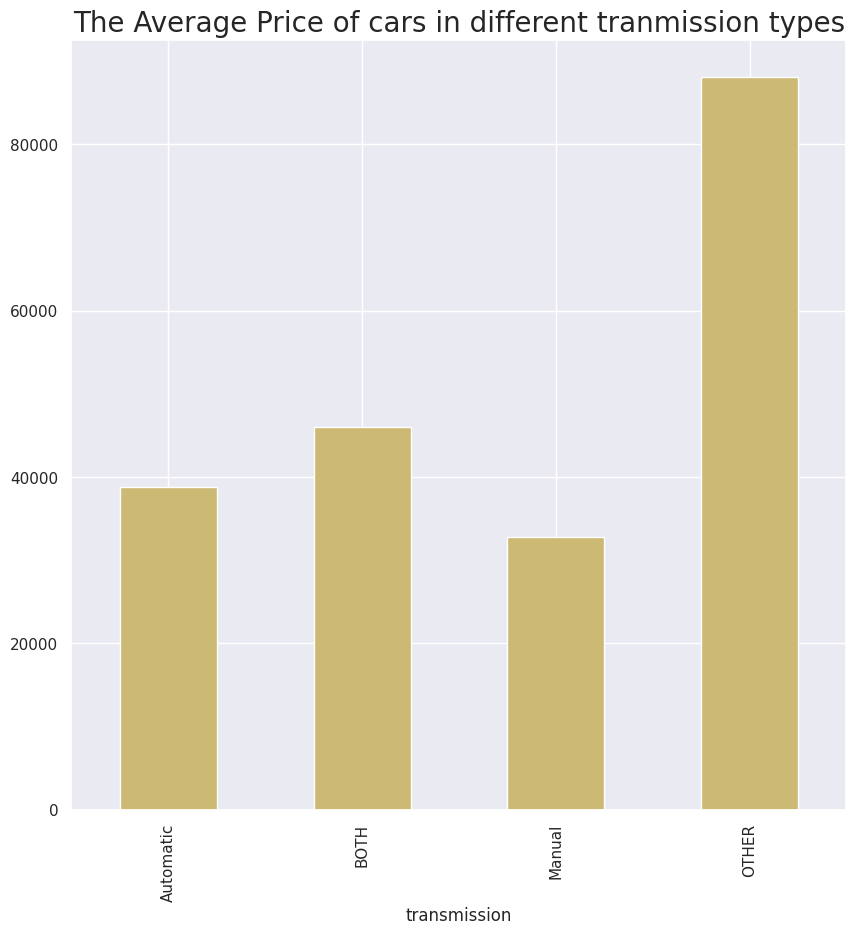

In [ ]:
plt.figure(figsize = (10, 10))
df_train.groupby('transmission')['price'].mean().plot(kind = 'bar', color = 'y')
plt.title("The Average Price of cars in different tranmission types", fontsize = 20)
plt.show();

In [ ]:
df_test["transmission"] = df_test["transmission"].apply(categorize_transmission)

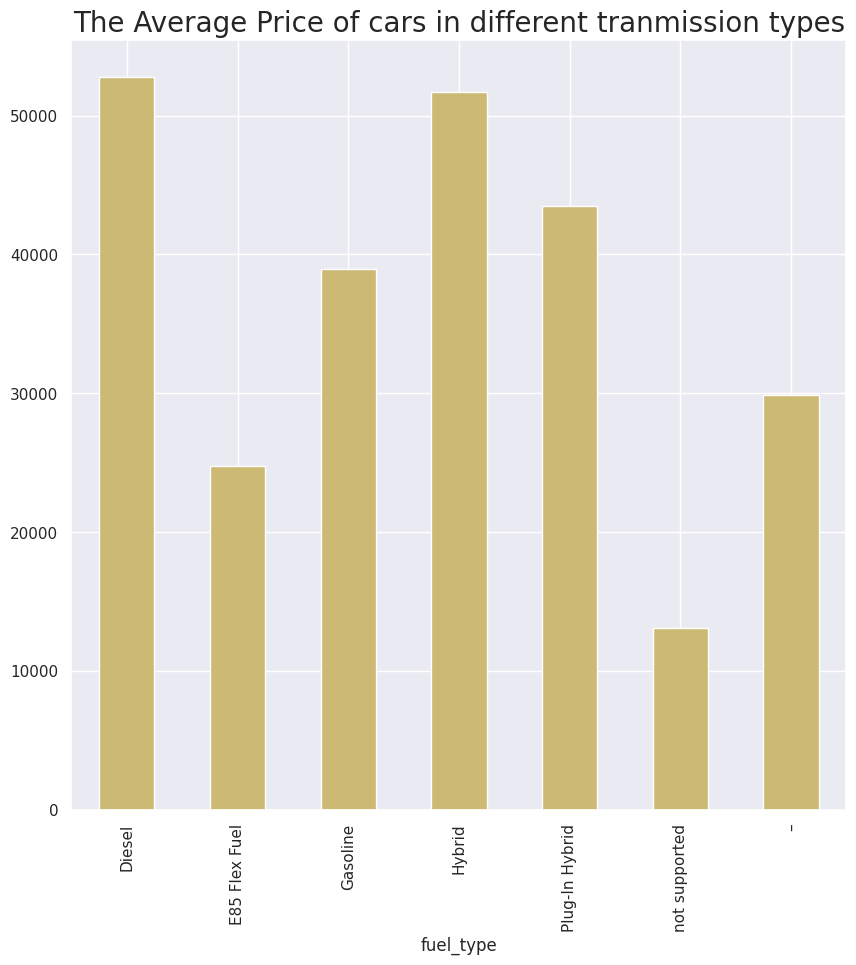

In [ ]:
plt.figure(figsize = (10, 10))
df_train.groupby('fuel_type')['price'].mean().plot(kind = 'bar', color = 'y')
plt.title("The Average Price of cars in different tranmission types", fontsize = 20)
plt.show()

In [ ]:
df_train['milage'].dtypes

dtype('int64')

Feature Selection

<Axes: >

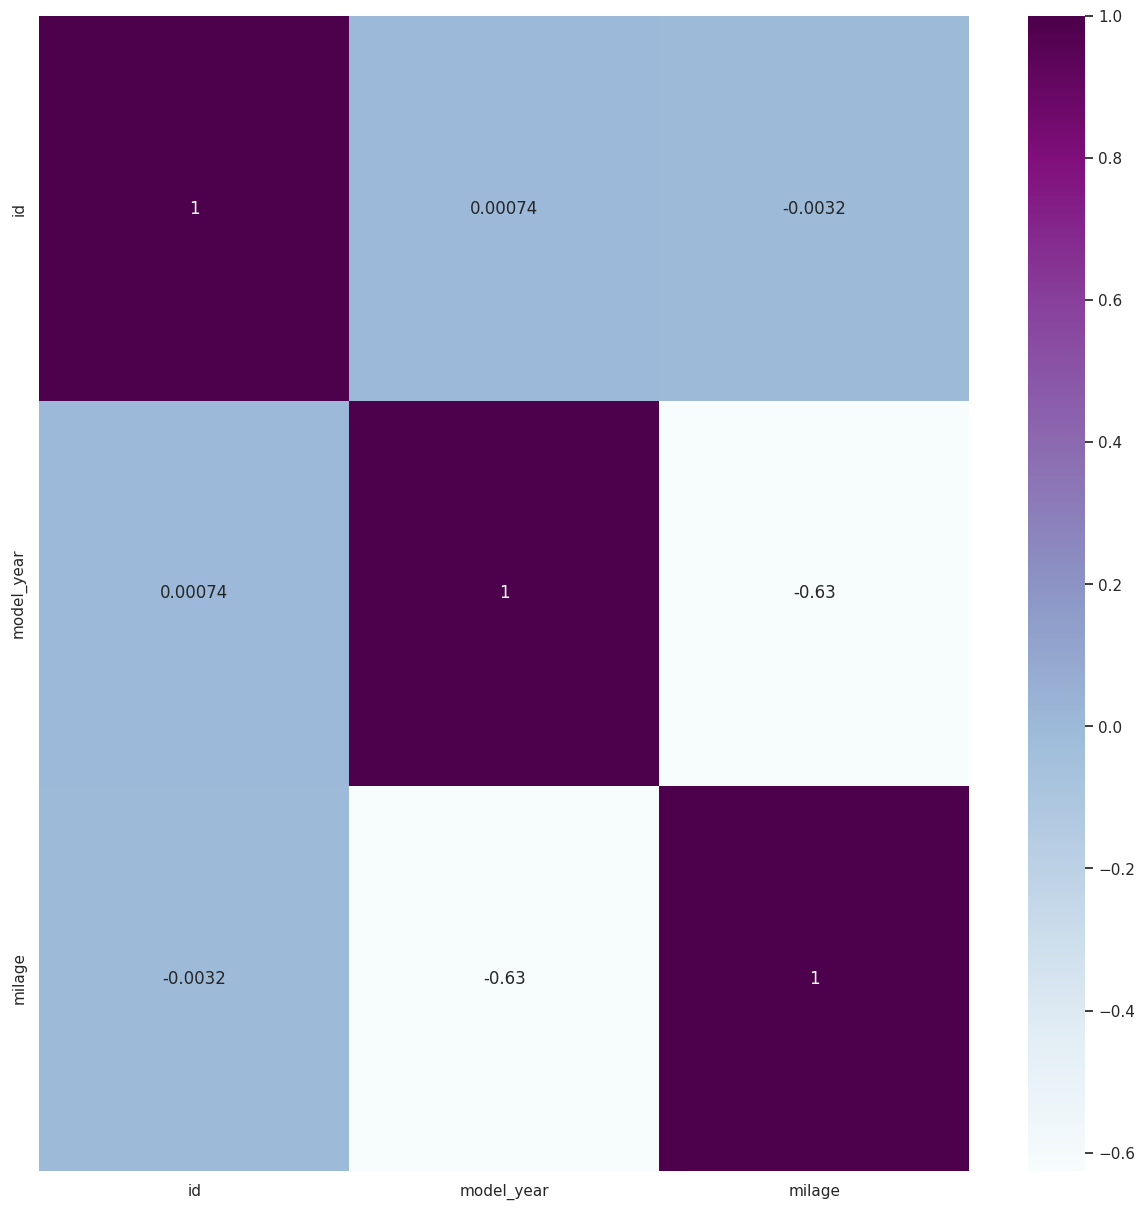

In [ ]:
plt.figure(figsize = (15, 15))
heatmap_data = df_train.select_dtypes('number').drop(columns='price').corr()
sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)


<Axes: >

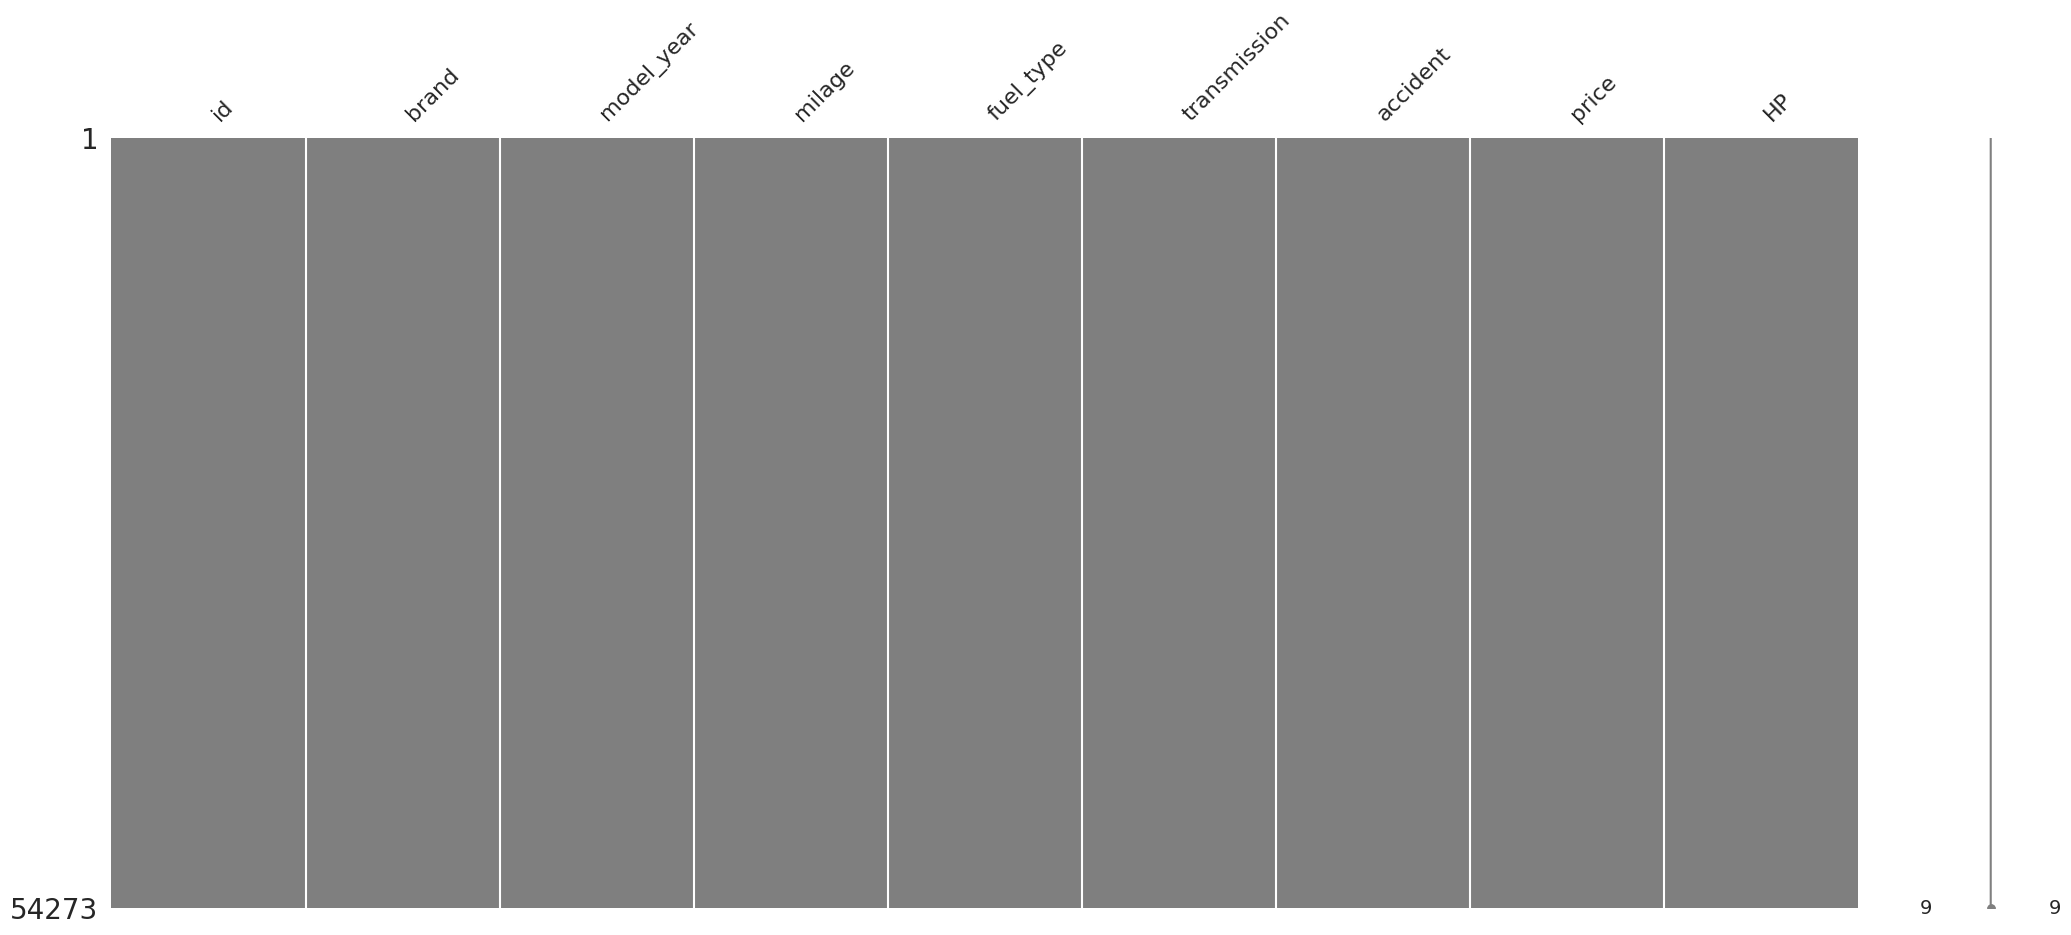

In [ ]:
msno.matrix(df_train, color = (0.5, 0.5, 0.5))

In [ ]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.regplot(df['Selling_Price'],df['Present_Price'])

plt.subplot(1,3,2)
sns.distplot(np.log(df['Selling_Price']))
plt.title('Distribution of Selling Price')


plt.subplot(1,3,3)
sns.distplot(np.log(df['Kms_Driven']))
plt.title('Distribution of KMS Drived')


plt.title('Kilometers Drived')
plt.show()

Dealing With Categorical Variables

In [ ]:
# Here's our categorical column
print(df_train['fuel_type'].unique())
print(df_train['transmission'].unique())
print(df_train['brand'].unique())

['Gasoline' 'Hybrid' 'E85 Flex Fuel' 'Diesel' '–' 'Plug-In Hybrid'
 'not supported']
['Automatic' 'Manual' 'Both' 'Other']
['Ford' 'BMW' 'Jaguar' 'Pontiac' 'Acura' 'Audi' 'GMC' 'Maserati'
 'Chevrolet' 'Porsche' 'Mercedes-Benz' 'Tesla' 'Lexus' 'Kia' 'Lincoln'
 'Dodge' 'Volkswagen' 'Land' 'Cadillac' 'Mazda' 'RAM' 'Subaru' 'Hyundai'
 'MINI' 'Jeep' 'Honda' 'Hummer' 'Nissan' 'Toyota' 'Volvo' 'Genesis'
 'Mitsubishi' 'Buick' 'INFINITI' 'McLaren' 'Scion' 'Lamborghini' 'Bentley'
 'Suzuki' 'Ferrari' 'Alfa' 'Rolls-Royce' 'Chrysler' 'Aston' 'Rivian'
 'Lotus' 'Saturn' 'Lucid' 'Mercury' 'Maybach' 'FIAT' 'Plymouth' 'Bugatti']


# Checking Multicollinearity Using VIF

In [ ]:
df_train['Present Year'] = 2024
df_train['model_year'] = df_train['Present Year'] - df_train['model_year']
df_train.drop(['Present Year'], inplace = True, axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_train[['brand','model_year','milage','fuel_type','transmission',
                        'accident','price']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only numerical columns for VIF calculation
numerical_variables = df_train[['model_year','milage','price']]

# Check for non-numeric values BEFORE conversion and dropping NaNs
print(numerical_variables.dtypes)  # Check data types of each column
# Inspect any columns with non-numeric types and decide how to handle them
# For example, if 'accident' contains strings like "Yes" and "No",
# you might want to convert them to 1 and 0 before applying pd.to_numeric

# Convert all columns to numeric, coercing errors to NaN
numerical_variables = numerical_variables.apply(pd.to_numeric, errors='coerce')

# Drop rows with any missing values (introduced by coercion)
numerical_variables = numerical_variables.dropna()

# Check if the DataFrame is empty AFTER dropping NaNs
print(numerical_variables.shape) # Should print number of rows and columns

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(numerical_variables.values, i) for i in range(numerical_variables.shape[1])]
vif["Features"] = numerical_variables.columns
vif

model_year    int64
milage        int64
price         int64
dtype: object
(54273, 3)


,VIF,Features
0,4.731248,model_year
1,4.628150,milage
2,1.099274,price


Now its look good, We have VIF < 5 and hence there is no Multicollinearity occurrence in our model.*

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model_year    54273 non-null  int64 
 3   milage        54273 non-null  int64 
 4   fuel_type     54273 non-null  object
 5   transmission  54273 non-null  object
 6   accident      54273 non-null  object
 7   price         54273 non-null  int64 
 8   HP            54273 non-null  object
dtypes: int64(4), object(5)
memory usage: 3.7+ MB


P-Value - P values are one of the best ways to determine if a variable is redundant(usefull or not) but they provide no information.

If a variable has a p-values >0.05, we can disregard it.

In [ ]:
df_train.head()

,id,brand,model_year,milage,fuel_type,transmission,accident,price,HP
0,0,Ford,6,74349,Gasoline,Automatic,None reported,11000,375.0HP
1,1,BMW,17,80000,Gasoline,Manual,None reported,8250,300.0HP
2,2,Jaguar,15,91491,Gasoline,Automatic,None reported,15000,300.0HP
3,3,BMW,2,2437,Hybrid,Both,None reported,63500,335.0HP
4,4,Pontiac,23,111000,Gasoline,Automatic,None reported,7850,200.0HP


In [ ]:
#Dealing With Categorical Variables, creagting dummie
clean_data = pd.get_dummies(df_train,drop_first=True)
clean_data.head()

,id,model_year,milage,price,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,...,HP_8.0L,HP_808.0HP,HP_835.0HP,HP_Electric,HP_I4,HP_Intercooled,HP_Standard,HP_V6,HP_V8,HP_–
0,0,6,74349,11000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,17,80000,8250,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,15,91491,15000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,2,2437,63500,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,23,111000,7850,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It is important to note that the values of the correlation coefficient lie between the range -1 to 1 respectively. The higher the positive correlation between the features, the more would be correlation coefficient value would move to 1. The higher the negative correlation between the features, the more would the correlation coefficient value move to -1 respectively.

In [ ]:
df_train["HP"].dtypes

dtype('O')

In [ ]:
# Clean the 'HP' column by removing non-numeric characters
df_train["HP"] = df_train["HP"].str.replace(r'\D', '', regex=True)

# Convert the 'HP' column to integer type, handling potential errors
df_train["HP"] = pd.to_numeric(df_train["HP"], errors='coerce').astype('Int64')

In [ ]:
# Clean the 'HP' column by removing non-numeric characters
df_test["HP"] = df_test["HP"].str.replace(r'\D', '', regex=True)

# Convert the 'HP' column to integer type, handling potential errors
df_test["HP"] = pd.to_numeric(df_test["HP"], errors='coerce').astype('Int64')

# Data Preprocessing

In [ ]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model_year    54273 non-null  int64 
 3   milage        54273 non-null  int64 
 4   fuel_type     54273 non-null  object
 5   transmission  54273 non-null  object
 6   accident      54273 non-null  object
 7   price         54273 non-null  int64 
 8   HP            53910 non-null  Int64 
dtypes: Int64(1), int64(4), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            36183 non-null  int64 
 1   brand         36183 non-null  object
 2   model_year    36183 non-null  int64 
 3   milage        36183 non-null  int64 
 4   fuel_

In [ ]:
X = df_train.drop('price', axis=1)
y = df_train['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

It is also time to create useful features that aid in predicting car prices. One feature is the ‘Years of Manufacture’ of the car. If the car is manufactured for a long time, the price would be influenced by this feature. As you can see in the above code snippet the ‘Years of Manufacture’ feature is created and assigned to the data.

In [ ]:
encoder = TargetEncoder(cols = 'brand')
encoder.fit(X_train['brand'], y_train.to_frame()['price'])
X_train['brand'] = encoder.transform(X_train['brand'])
X_test['brand'] = encoder.transform(X_test['brand'])

It is now time to perform one-hot encoding where all the categorical features are converted to numerical features which help in processing for the machine learning models. We take all the categorical features such as ‘Engine Fuel Type’ and ‘Driven Wheels’ and convert them to numerical features for efficient computation.

In [ ]:
X_train.head()

,id,brand,model_year,milage,fuel_type,transmission,accident,HP
787,787,48174.998726,2016,89400,Gasoline,Both,None reported,3400
18565,18565,38453.525309,2019,31600,Gasoline,Automatic,None reported,4600
134,134,45613.625952,2007,191900,E85 Flex Fuel,Automatic,At least 1 accident or damage reported,3100
30516,30516,39577.270396,2009,94500,Gasoline,Automatic,At least 1 accident or damage reported,3200
11026,11026,28145.551667,2013,161000,Gasoline,Automatic,At least 1 accident or damage reported,4000


In [ ]:
encoder = OneHotEncoder()
encoder.fit(X_train[['fuel_type', 'transmission', 'accident', 'HP']])
X_train = encoder.transform(X_train[['fuel_type', 'transmission', 'accident', 'HP']])
X_test = encoder.transform(X_test[['fuel_type', 'transmission', 'accident', 'HP']])

In [ ]:
X_train.head()

,fuel_type_1,fuel_type_2,fuel_type_3,fuel_type_4,fuel_type_5,fuel_type_6,fuel_type_7,transmission_1,transmission_2,transmission_3,transmission_4,accident_1,accident_2,HP
787,1,0,0,0,0,0,0,1,0,0,0,1,0,3400
18565,1,0,0,0,0,0,0,0,1,0,0,1,0,4600
134,0,1,0,0,0,0,0,0,1,0,0,0,1,3100
30516,1,0,0,0,0,0,0,0,1,0,0,0,1,3200
11026,1,0,0,0,0,0,0,0,1,0,0,0,1,4000


X_train.head(

In [ ]:
X_train.head()

,brand,model_year,milage,fuel_type,transmission,accident,HP
787,48174.998726,8,89400,Gasoline,Both,None reported,3400
18565,38453.525309,5,31600,Gasoline,Automatic,None reported,4600
134,45613.625952,17,191900,E85 Flex Fuel,Automatic,At least 1 accident or damage reported,3100
30516,39577.270396,15,94500,Gasoline,Automatic,At least 1 accident or damage reported,3200
11026,28145.551667,11,161000,Gasoline,Automatic,At least 1 accident or damage reported,4000


In [ ]:
# Assuming 'fuelType' is the column with 'Gasoline' and other string values
X_train = pd.get_dummies(X_train, columns=['fuel_type','transmission','accident'])
X_test = pd.get_dummies(X_test, columns=['fuel_type','transmission','accident'])

# Get missing columns in the training test
missing_cols = set(X_train.columns) - set(X_test.columns)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0

# Get missing columns in the test set
missing_cols_test = set(X_test.columns) - set(X_train.columns)
# Add a missing column in the training set with default value equal to 0
for c in missing_cols_test:
    X_train[c] = 0

# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)

error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
X_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
787,787,Land,Rover Range Rover 3.0L Supercharged HSE,2016,89400,Gasoline,340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,33800
18565,18565,Ford,Mustang GT Premium,2019,31600,Gasoline,460.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes,43500
134,134,Chevrolet,Tahoe LTZ,2007,191900,E85 Flex Fuel,310.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Green,Black,At least 1 accident or damage reported,Yes,12850
30516,30516,GMC,Yukon SLT,2009,94500,Gasoline,320.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,11990
11026,11026,Lincoln,Navigator L,2013,161000,Gasoline,400.0HP 5.6L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,22000


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test_new)

ValueError: could not convert string to float: 'Land'

In [ ]:
X_train.columns

Index(['id', 'brand', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'accident', 'clean_title', 'price'],
      dtype='object')

In [ ]:

model = LinearRegression()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)

error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

ValueError: could not convert string to float: 'Gasoline'

In [ ]:
model = DecisionTreeRegressor(splitter = 'random')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)


NameError: name 'X_train_new' is not defined

In [ ]:
 # Convert the 'brand' column to numeric values using one-hot encoding
X_test_new = pd.get_dummies(X_test_new, columns=['fuel_type'])